##Bring in libraries and dataframes

In [1]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Trial run to measure the effect of pot type on temperature in the root zone.

From November 2014 until 17th of December treatments were:

* P = Green plastic pot with dark color mulch
* F = Aluminum foil with dark color mulch
* PW = Green plastic with white mulch
* FW = Aluminum foil with white mulch
* T = Terricotta pot with dark mulch
* TT = double terricotta pot with sand packing in between with dark mulch on top
* TP = Plastic pot within terricotta pot with dark mulch on top
* P = Terricotta pot in sand plunge with dark mulch on top

Between 18 December 2014 and 18 January 2015 pots were not watered because we were on holiday.  On 18 January 2015 two of the treatments were changed to: 

* P = Green plastic pot with dark color mulch
* F = Double Terricotta, two same size pots stacked in deep water pan with white mulch
* PW = Black plastic with dark mulch
* FW = Aluminum foil with white mulch
* T = Terricotta pot with dark mulch
* TT = double terricotta pot with sand packing in between with dark mulch on top
* TP = Plastic pot within terricotta pot with dark mulch on top
* P = Terricotta pot in sand plunge with dark mulch on top

Stopped water again on 24 of January 2015 when I went hiking up jolly river and trial disestablished on 1 February

##Bring in data and indexes

In [5]:
SensorCoefficients = pd.read_pickle('D:\GitHubRepos\PotTemp\SensorCoefficients.pkl')
PotData=pd.read_csv('D:\GitHubRepos\PotTemp\PotTempCR1000.dat', #specify file path for data to read in
                         parse_dates=True, #tell the function to parse date columns to datetime formats
                         skiprows = [0,2,3], #leave out the first 2 rows which have redundant information
                         index_col = 0, #Use the first column, which is Date, as an index
                         na_values = 'NAN')
SensorIndex=pd.read_csv('D:\GitHubRepos\PotTemp\PotTempSensorLayout.csv',
                         index_col = 0, #Use the first column, which is Date, as an index
                         na_values = 'NAN')

##Apply calibrations to data

In [6]:
PotData

,RECORD,BattV_Avg,PTemp_C_Avg,T109_C(1),T109_C(2),T109_C(3),T109_C(4),T109_C(5),T109_C(6),T109_C(7),...,T109_C(26),T109_C(27),T109_C(28),T109_C(29),T107_C(1),T107_C(2),T107_C(3),T107_C(4),SlrkW,SlrMJ
TIMESTAMP,,,,,,,,,,,,,,,,,,,,,
2014-11-08 14:30:00,0,NaN,NaN,-2.766,-2.668,-2.870,-2.744,-2.537,-2.755,-2.684,...,-2.930,-2.749,-2.777,NaN,16.71,17.28,16.61,17.04,0.000,0.000000
2014-11-08 14:40:00,1,NaN,NaN,-2.728,-2.651,-2.848,-2.711,-2.515,-2.755,-2.673,...,-2.941,-2.733,-2.788,NaN,28.15,17.01,18.52,16.90,0.000,0.000000
2014-11-08 14:50:00,2,NaN,NaN,-2.531,-2.640,-2.771,-2.624,-2.504,-2.449,-2.291,...,-2.919,-2.482,-2.755,NaN,29.21,25.60,24.40,24.55,0.000,0.000000
2014-11-08 15:00:00,3,NaN,NaN,-2.537,-2.297,-2.777,-2.646,-2.253,-2.351,-2.302,...,-2.831,-2.487,-2.651,NaN,29.58,26.18,24.81,24.81,0.000,0.000000
2014-11-08 15:10:00,4,NaN,NaN,-2.564,-2.253,-2.782,-2.668,-2.253,-2.362,-2.291,...,-2.799,-2.515,-2.668,NaN,29.86,26.59,25.10,24.98,0.000,0.000000
2014-11-08 15:20:00,5,NaN,NaN,-2.580,-2.280,-2.799,-2.668,-2.286,-2.406,-2.302,...,-2.777,-2.526,-2.673,NaN,30.04,26.81,25.17,24.90,0.000,0.000000
2014-11-08 15:30:00,6,NaN,NaN,-2.597,-2.286,-2.810,-2.689,-2.297,-2.395,-2.302,...,-2.766,-2.542,-2.689,NaN,29.86,26.87,25.25,24.67,0.000,0.000000
2014-11-08 15:40:00,7,NaN,NaN,-2.613,-2.286,-2.810,-2.700,-2.318,-2.406,-2.302,...,-2.733,-2.575,-2.700,NaN,29.51,26.77,25.36,24.30,0.000,0.000000
2014-11-08 15:50:00,8,NaN,NaN,-2.629,-2.302,-2.831,-2.706,-2.329,-2.411,-2.329,...,-2.722,-2.591,-2.711,NaN,29.35,26.70,25.38,24.01,0.000,0.000000


In [7]:
PotTemps = pd.DataFrame(index=PotData.index)
for X in range (1,30):
    SensorNum = X
    SensorRef = 'T109_C(' + np.str(SensorNum ) + ')'  #Create reference to sensor label
    Slope = SensorCoefficients.ix[SensorRef,'Slope']
    Intercept = SensorCoefficients.ix[SensorRef,'Intercept']
    PotTemps[SensorRef] = PotData.ix[:,SensorRef] * Slope + Intercept
for X in range (1,5):
    SensorNum = X
    SensorRef = 'T107_C(' + np.str(SensorNum ) + ')'  #Create reference to sensor label
    PotTemps[SensorRef] = PotData.ix[:,SensorRef]    
PotTemps['BattV_Avg'] = PotData['BattV_Avg']
PotTemps['PTemp_C_Avg'] = PotData['PTemp_C_Avg']
PotTemps['SlrkW'] = PotData['SlrkW']
PotTemps['SlrMJ'] = PotData['SlrMJ']

In [8]:
SensorNum = 7
SensorRef = 'T109_C(' + np.str(SensorNum ) + ')'  #Create reference to sensor label
SensorCoefficients.ix[SensorRef,'Slope']

25.375153663558827

##Apply indexes to data

In [9]:
PotTempsTransposed= PotTemps.transpose()
PotTempsIndexed = pd.concat([SensorIndex,PotTempsTransposed], axis=1)
PotTempsIndexed.index.name = 'SensorRef'#.sort()
PotTempsIndexed.set_index(['Treatment','Rep','Sensor'],inplace=True,append=True)
PotTempsIndexed.sortlevel('Treatment')
Data=PotTempsIndexed.transpose()
CleanData = Data.where(Data<100,np.nan)
CleanData = CleanData.where(Data>0,np.nan)
CleanData.interpolate()
CleanData.index = CleanData.index.to_datetime()

In [10]:
TempDataGrouped = CleanData.groupby(axis = 1, level='Treatment').mean()
TempDataGrouped = TempDataGrouped.dropna(axis=1, how='all')

In [11]:
TempDataGrouped.columns

Index([u'AirTemp', u'Expt', u'F', u'FW', u'P', u'PTemp', u'PW', u'Plunge',
       u'T', u'TP', u'TT'],
      dtype='object', name=u'Treatment')

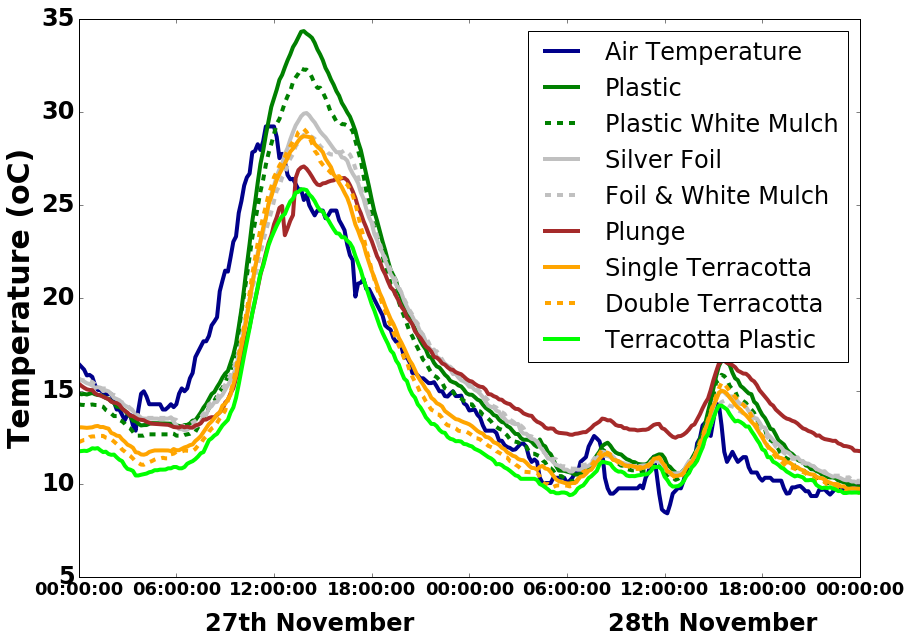

In [48]:
Start = '2014-11-27 0:00'
End = '2014-11-29 0:00'
Colors = ['darkblue','green','green','silver','silver','brown','orange','orange','lime']
Styles = ['-','-','--','-','--','-','-','--','-']
Lables = ['Air Temperature',
          'Plastic',
          'Plastic White Mulch',
          'Silver Foil',
          'Foil & White Mulch',
          'Plunge',
          'Single Terracotta',
          'Double Terracotta',
          'Terracotta Plastic']
#Temperatures = ['Plunge','T','TT','TP', 'P','PW','F','FW','AirTemp']
Temperatures = ['AirTemp','P','PW','F','FW','Plunge','T','TT','TP']
figure = plt.figure(figsize=(14,10))
Sequence = 0
for Temp in Temperatures:
    plt.plot(TempDataGrouped.ix[Start:End].index,
           TempDataGrouped.ix[Start:End,Temp],
             color = Colors[Sequence],
             linestyle = Styles[Sequence],
             linewidth = 4,
             label = Lables[Sequence]
            )
    Sequence += 1

plt.ylabel('Temperature (oC)',fontsize = 30,weight='bold')
#plt.xlabel('Time',fontsize = 24)
#plt.title('27th and 28th November 2014', fontsize = 24)
plt.yticks(fontsize = 24, weight='bold')
plt.xticks(fontsize = 18, weight='bold')
plt.legend(loc=1, fontsize = 24)
plt.ylim(5,35)

figure.text(0.25,0.05,'27th November', fontsize = 24,weight='bold') 
figure.text(0.65,0.05,'28th November', fontsize = 24,weight='bold') 
plt.savefig('PotTemp.jpg',dpi=400)

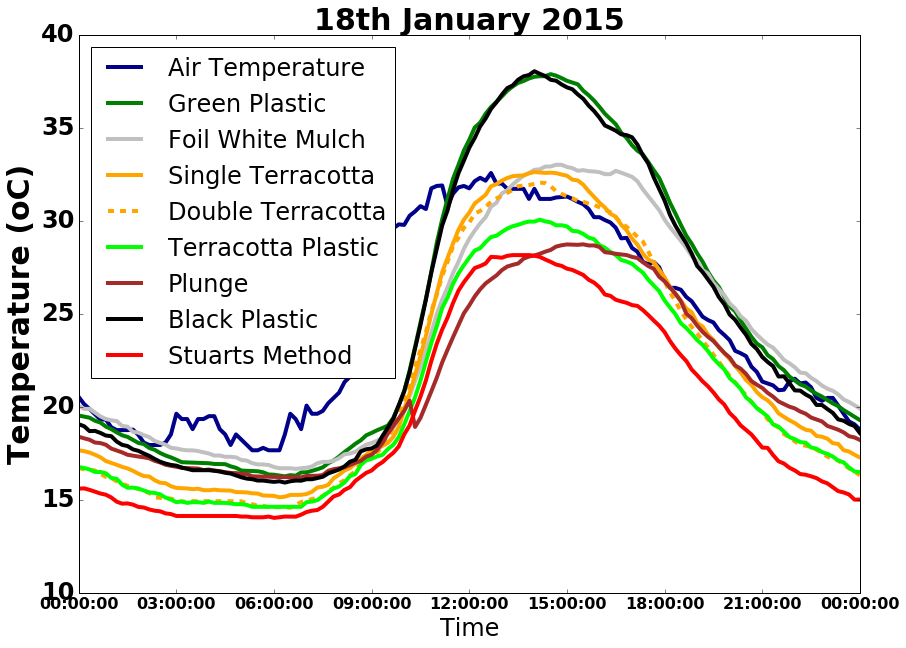

In [58]:
Start = '2015-1-18 0:00'
End = '2015-1-19 0:00'
Colors = ['darkblue','green','silver','orange','orange','lime','brown','black','red',]
Styles = ['-','-','-','-','--','-','-','-','-']
Lables = ['Air Temperature',
          'Green Plastic',
          'Foil White Mulch',
          'Single Terracotta',
          'Double Terracotta',
          'Terracotta Plastic',
          'Plunge',
          'Black Plastic',
          'Stuarts Method',
          ]
Temperatures = ['AirTemp','P','FW','T','TT','TP','Plunge','PW','F']
figure = plt.figure(figsize=(14,10))
Sequence = 0
for Temp in Temperatures:
    plt.plot(TempDataGrouped.ix[Start:End].index,
           TempDataGrouped.ix[Start:End,Temp],
             color = Colors[Sequence],
             linestyle = Styles[Sequence],
             linewidth = 4,
             label = Lables[Sequence]
            )
    Sequence += 1

plt.ylabel('Temperature (oC)',fontsize = 30,weight='bold')
plt.xlabel('Time',fontsize = 24)
plt.title('18th January 2015', fontsize = 30,weight='bold')
plt.yticks(fontsize = 24,weight='bold')
plt.xticks(fontsize = 16,weight='bold')
plt.legend(loc=2, fontsize = 24)
plt.savefig('PotTemp2.jpg',dpi=400)

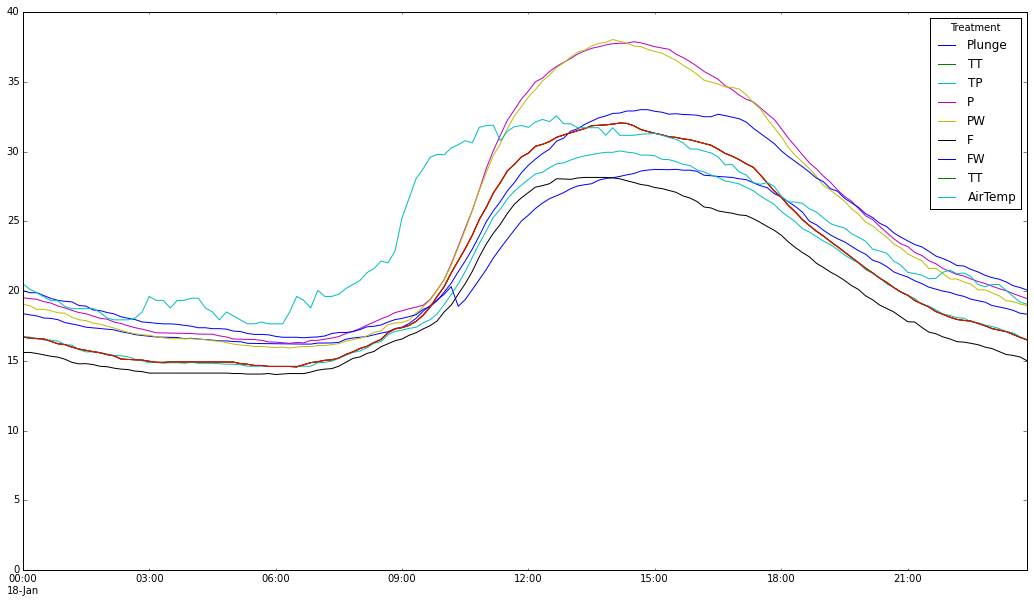

In [11]:
TempDataGrouped.ix['2015-1-18',['Plunge','TT','TP','P','PW','F','FW','TT','AirTemp']].plot(figsize=(18,10), ylim=(0,40))


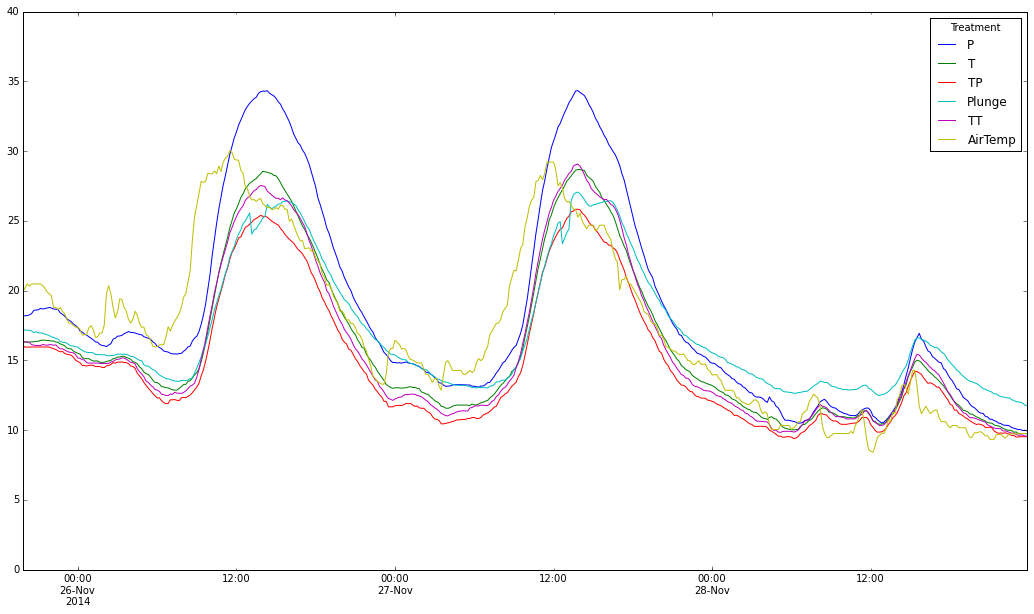

In [12]:
TempDataGrouped.ix['2014-11-24':'2014-11-28',['P','T','TP','Plunge','TT','AirTemp']].plot(figsize=(18,10), ylim=(0,40))

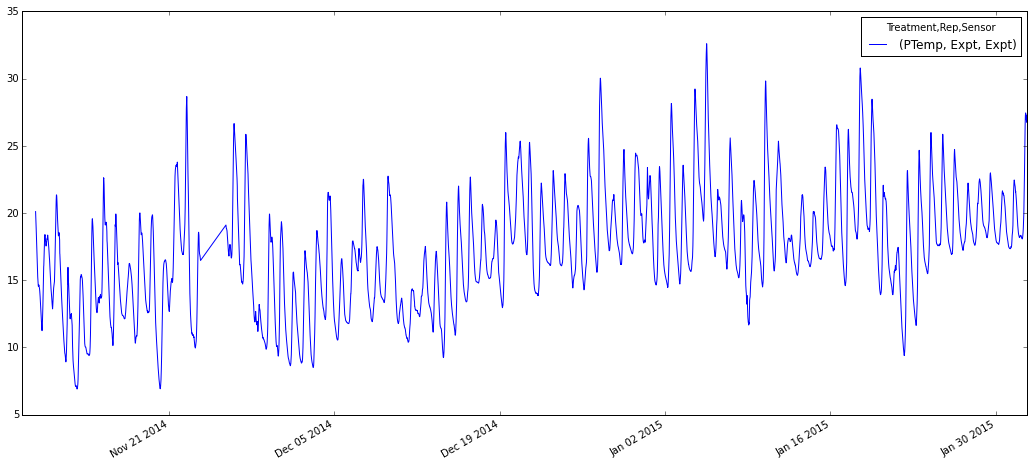

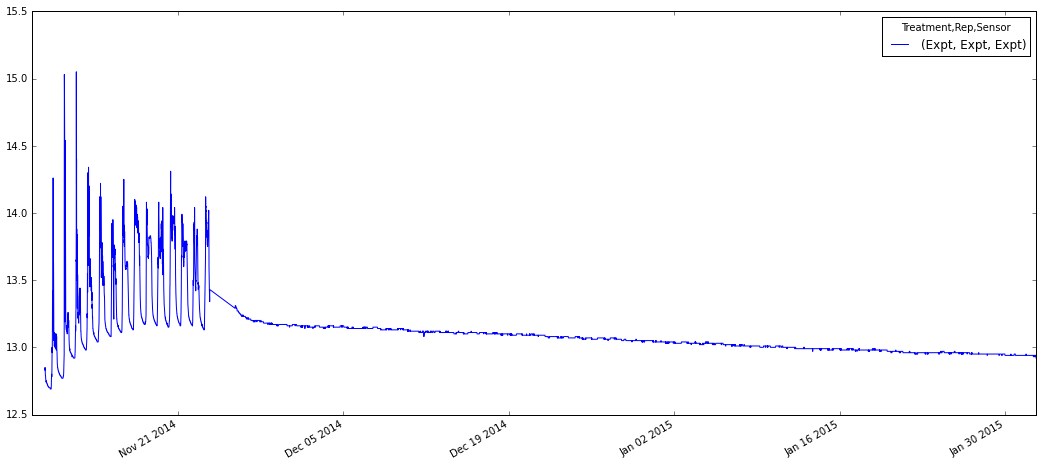

In [13]:
CleanData.PTemp_C_Avg.ix['2014-11-01':,:].plot(figsize=(18,8))
CleanData.BattV_Avg.ix['2014-11-01':,:].plot(figsize=(18,8))

In [14]:

#Data.replace(Data>100, value='nan', inplace=True)


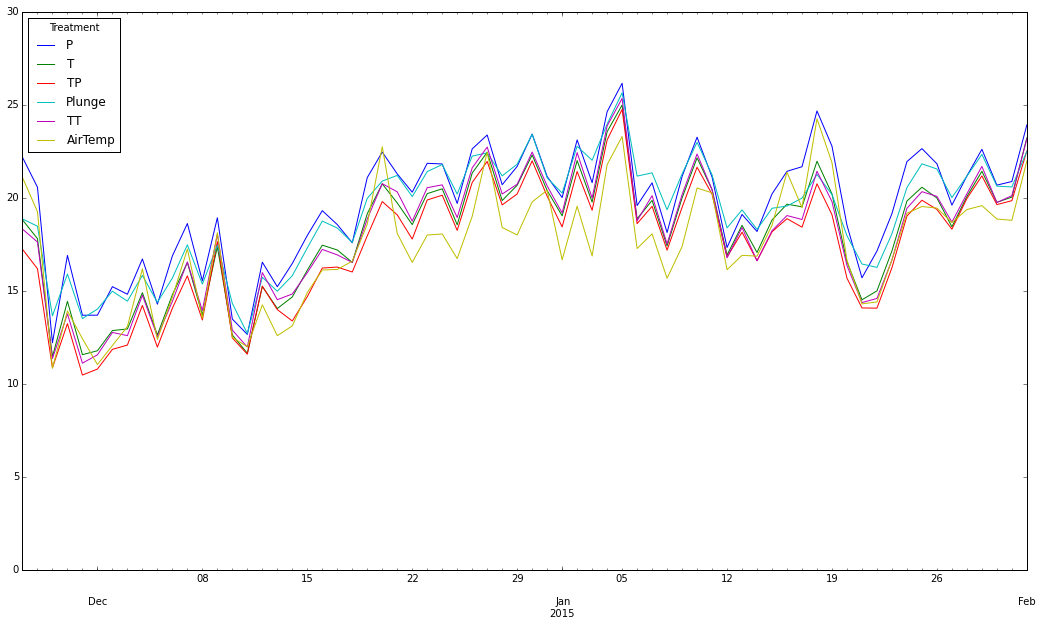

In [15]:
DailyMeans = TempDataGrouped.resample('D', how='mean')
DailyMeans.ix['2014-11-26':,['P','T','TP','Plunge','TT','AirTemp']].plot(figsize=(18,10), ylim=(0,30))

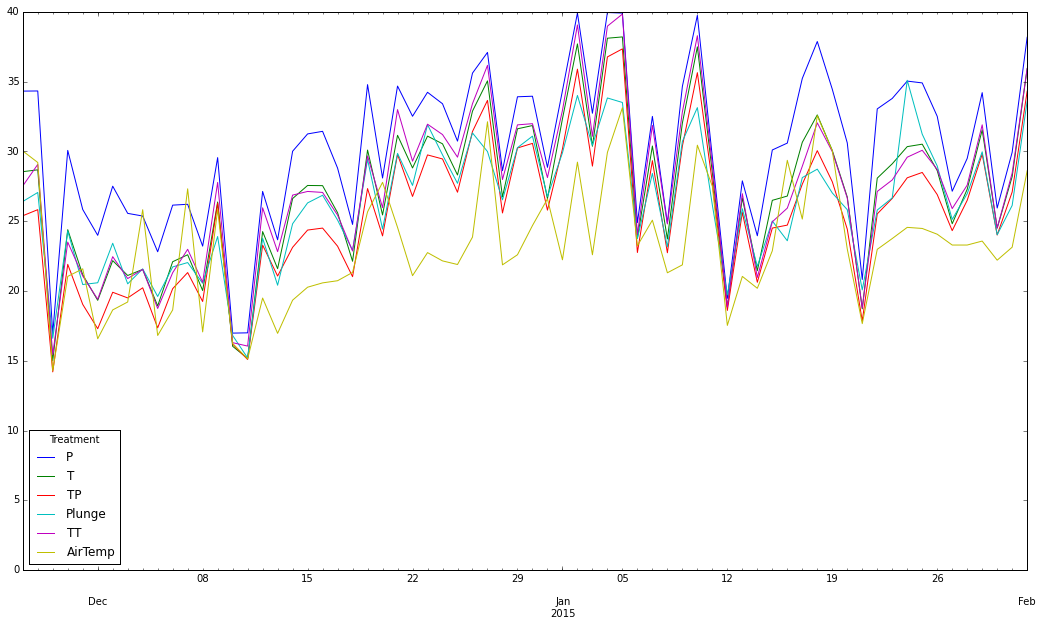

In [39]:
TempDataGrouped.where(TempDataGrouped<40,np.nan,inplace=True)
DailyMax = TempDataGrouped.resample('D', how='max')
DailyMax.ix['2014-11-26':,['P','T','TP','Plunge','TT','AirTemp']].plot(figsize=(18,10), ylim=(0,40))

(array([ 735616.,  735617.,  735618.,  735619.,  735620.,  735621.]),
 <a list of 6 Text xticklabel objects>)

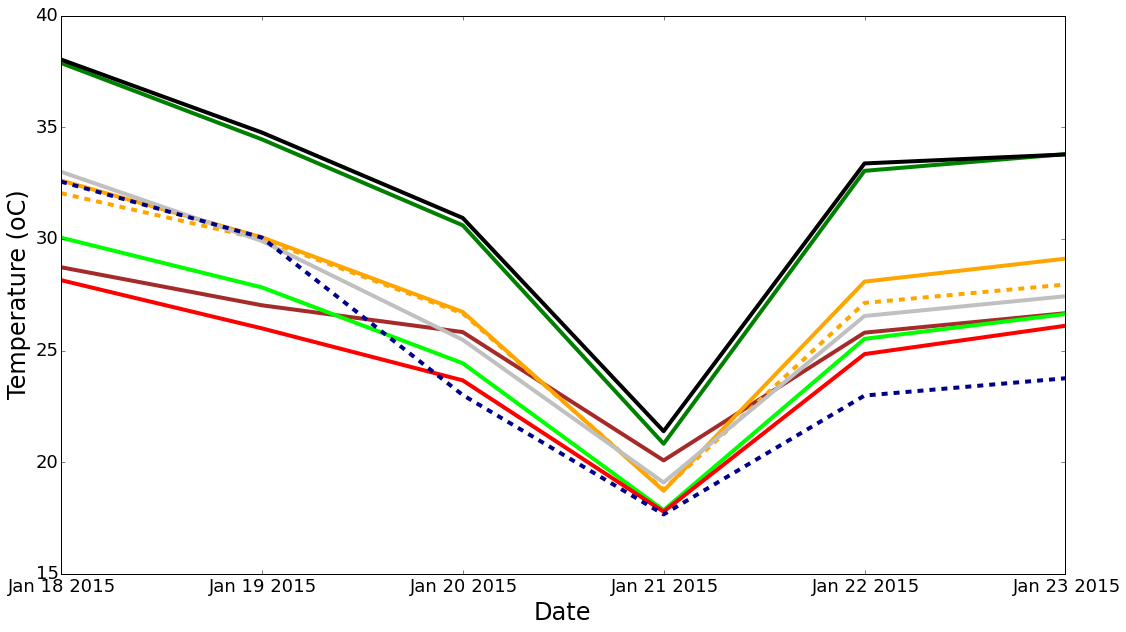

In [41]:
Start = '2015-1-18 0:00'
End = '2015-1-23 0:00'
Colors = ['brown','orange','orange','lime','green','silver', 'black','red','darkblue']
Styles = ['-','-','--','-','-','-','-','-','--']
Lables = ['1. Plunge',
          '2. Single Terracotta',
          '3. Double Terracotta',
          '4. Terracotta Plastic',
          '5. Green Plastic',
          '8. Foil White Mulch',
          '9. Black Plastic',
          '10. Stuarts Method',
          'Air Temperature']
Temperatures = ['Plunge','T','TT','TP','P','FW','PW','F','AirTemp']
figure = plt.figure(figsize=(18,10))
Sequence = 0
for Temp in Temperatures:
    plt.plot(DailyMax.ix[Start:End].index,
          DailyMax.ix[Start:End,Temp],
             color = Colors[Sequence],
             linestyle = Styles[Sequence],
             linewidth = 4,
             label = Lables[Sequence]
            )
    Sequence += 1

plt.ylabel('Temperature (oC)',fontsize = 24)
plt.xlabel('Date',fontsize = 24)
#plt.title('Pasture intake Vs Feed imported', fontsize = 24)
plt.yticks(fontsize = 18)
plt.xticks(fontsize = 18)
#plt.legend(loc=2, fontsize = 18)

(array([ 735564.,  735567.,  735570.,  735573.,  735576.,  735579.,  735582.]),
 <a list of 7 Text xticklabel objects>)

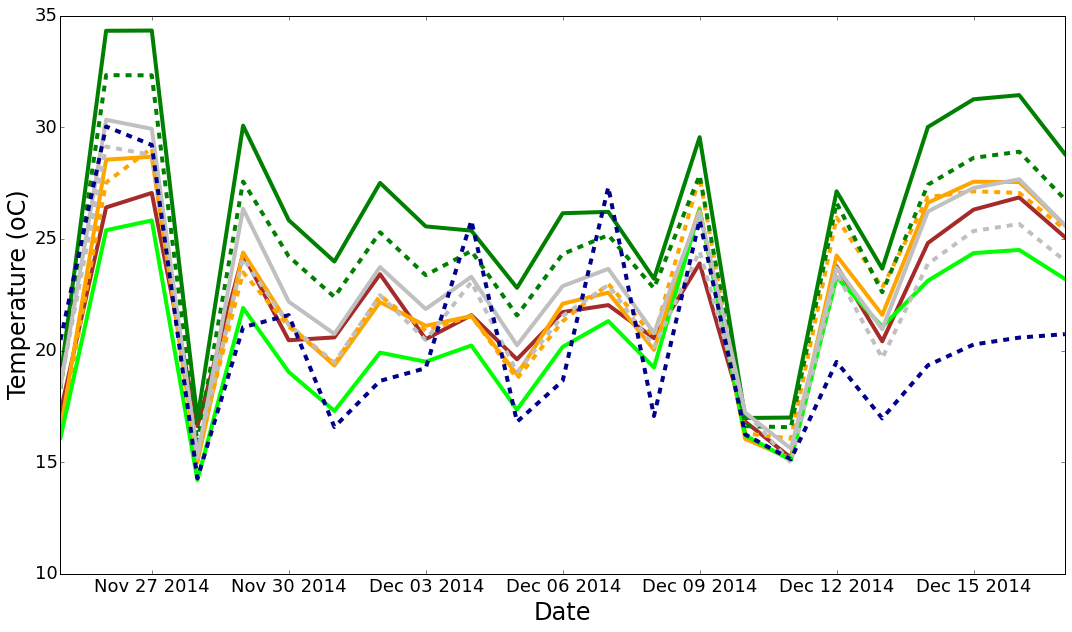

In [33]:
Start = '2014-11-25 0:00'
End = '2014-12-17 0:00'
Colors = ['brown','orange','orange','lime','green','green','silver','silver','darkblue']
Styles = ['-','-','--','-','-','--','-','--','--']
Lables = ['1. Plunge',
          '2. Single Terracotta',
          '3. Double Terracotta',
          '4. Terracotta Plastic',
          '5. Plastic',
          '6. Plastic White Mulch',
          '7. Silver Foil',
          '8. Foil & White Mulch',
          'Air Temperature']
Temperatures = ['Plunge','T','TT','TP','P','PW','F','FW','AirTemp']
figure = plt.figure(figsize=(18,10))
Sequence = 0
for Temp in Temperatures:
    plt.plot(DailyMax.ix[Start:End].index,
          DailyMax.ix[Start:End,Temp],
             color = Colors[Sequence],
             linestyle = Styles[Sequence],
             linewidth = 4,
             label = Lables[Sequence]
            )
    Sequence += 1

plt.ylabel('Temperature (oC)',fontsize = 24)
plt.xlabel('Date',fontsize = 24)
#plt.title('Pasture intake Vs Feed imported', fontsize = 24)
plt.yticks(fontsize = 18)
plt.xticks(fontsize = 18)
#plt.legend(loc=2, fontsize = 18)